# 1. Teste Z para duas amostras independentes

- Número de amostras maior ou igual a 30;
- Necessita de conhecimento do desvio padrão.

## Objetivo: Analisar a diferença entre as médias de mulheres e homens para a nota de um dos componentes de redação do colégio X

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as stats

from statsmodels.stats.weightstats import ztest

sns.set()

In [2]:
enem_sp = pd.read_csv(r'C:\Users\herna\OneDrive\Análise de Dados com Python\enem_2019_tratado.csv',sep=',',encoding='iso-8859-1')

In [3]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [4]:
colegiox = enem_sp.loc[enem_sp['CO_ESCOLA']==35017632.0]

In [5]:
colegiox.shape

(41, 28)

In [6]:
colegiox_mulher = colegiox.loc[colegiox['SEXO']=='F']

In [7]:
colegiox_mulher.shape

(28, 28)

In [8]:
colegiox_homem = colegiox.loc[colegiox['SEXO']=='M']

In [9]:
colegiox_homem.shape

(13, 28)

## 2. Análise de outliers

In [22]:
px.box(colegiox_mulher, y='COMP5')

In [23]:
px.box(colegiox_homem, y='COMP5')

## 3. Análise de normalidade

- Nível de significância de 0,05 ou 5%;
- Quando p > 0,05, distribuição normal.

In [25]:
# teste shapiro wilk

stats.shapiro(colegiox_mulher['COMP5'])

ShapiroResult(statistic=0.9521203637123108, pvalue=0.2238943725824356)

In [26]:
# teste shapiro wilk

stats.shapiro(colegiox_homem['COMP5'])

ShapiroResult(statistic=0.942307710647583, pvalue=0.48747238516807556)

<AxesSubplot:xlabel='COMP5', ylabel='Probability'>

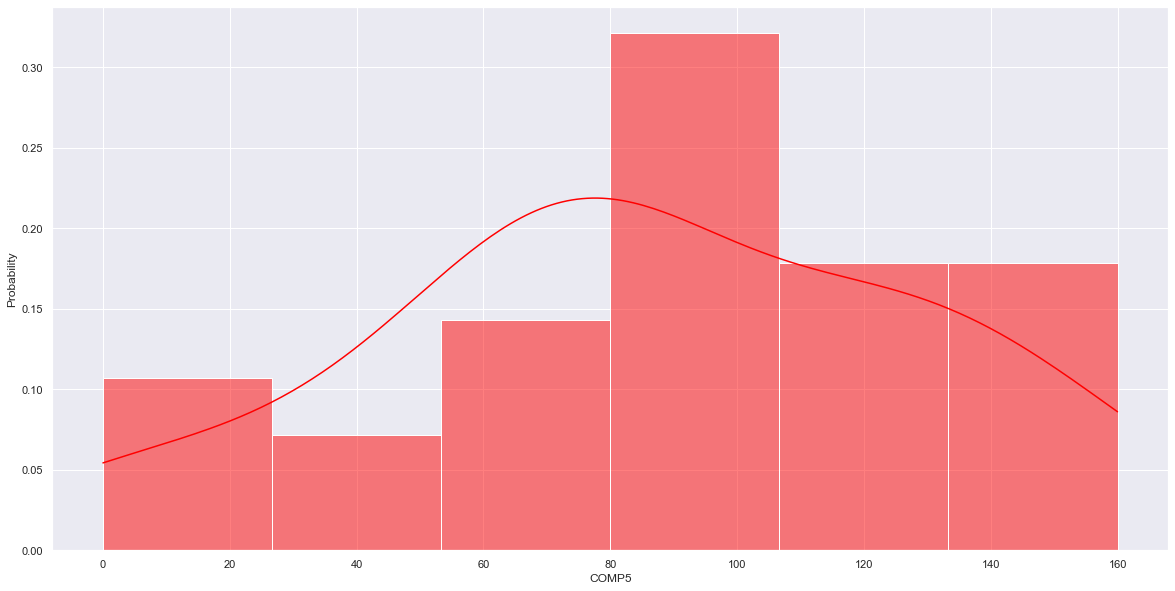

In [28]:
plt.figure(figsize=(20,10))
sns.histplot(colegiox_mulher, x='COMP5', bins=6, color='red',kde=True, stat='probability')

<AxesSubplot:xlabel='COMP5', ylabel='Probability'>

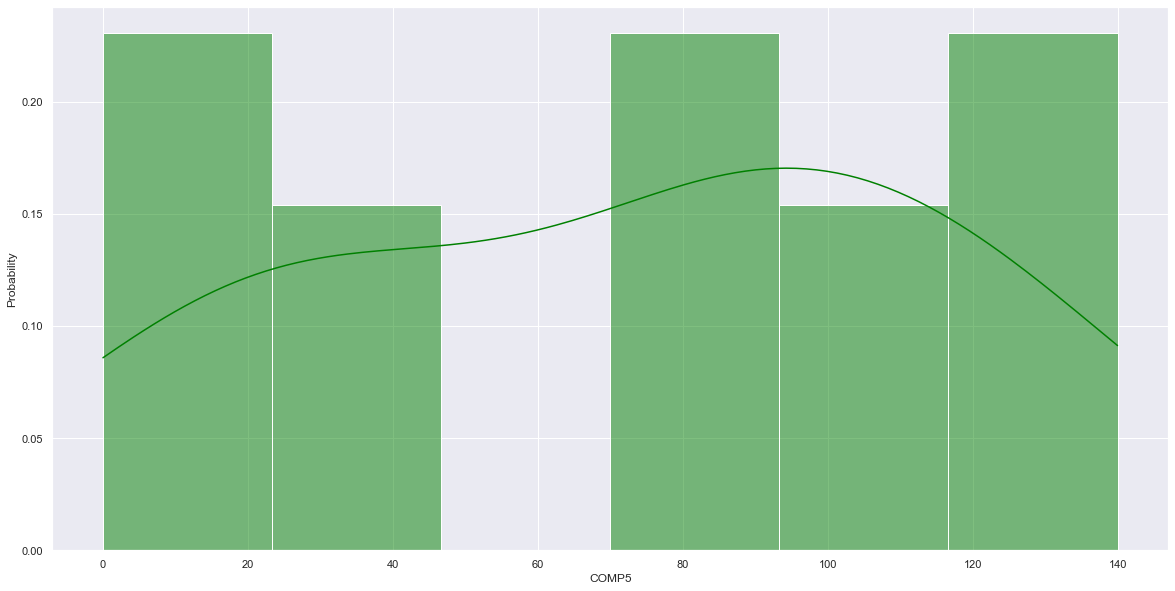

In [29]:
plt.figure(figsize=(20,10))
sns.histplot(colegiox_homem, x='COMP5', bins=6, color='green',kde=True, stat='probability')

Text(0.5, 1.0, 'Normal Q-Q Plot (mulheres)')

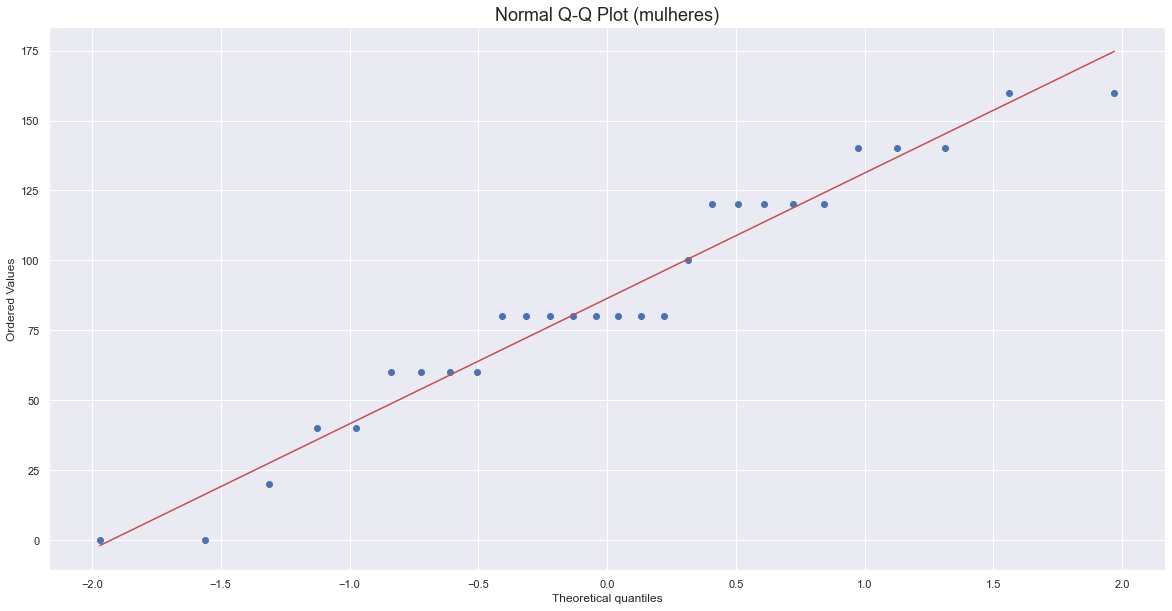

In [31]:
plt.figure(figsize=(20,10))
stats.probplot(colegiox_mulher['COMP5'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot (mulheres)', fontsize=18)

Text(0.5, 1.0, 'Normal Q-Q Plot (homens)')

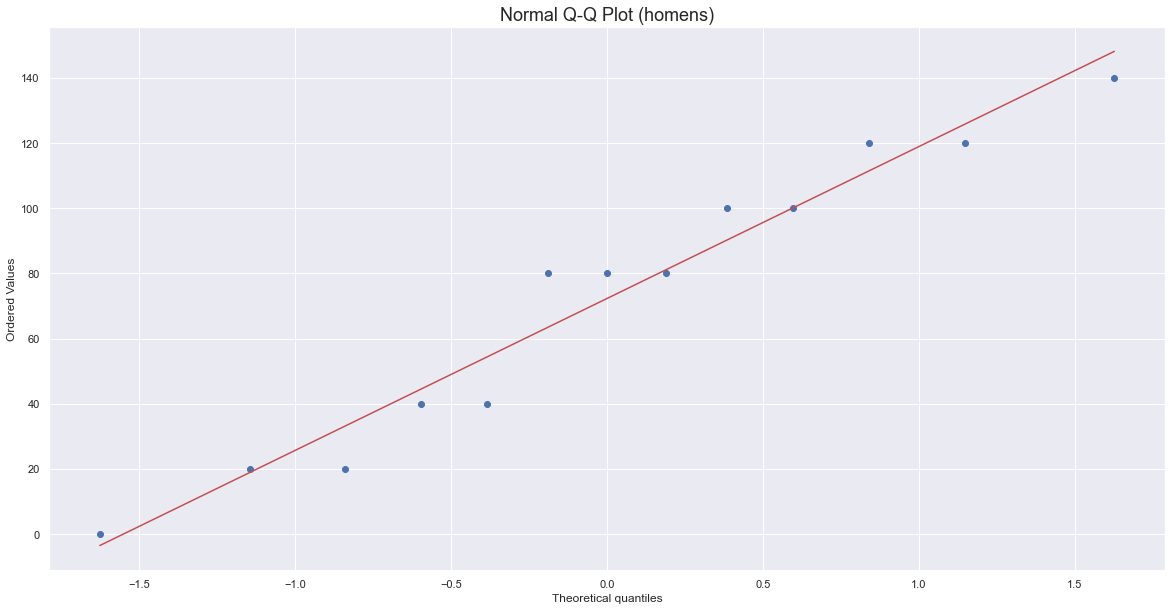

In [32]:
plt.figure(figsize=(20,10))
stats.probplot(colegiox_homem['COMP5'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot (homens)', fontsize=18)

## 4. Aplicação do Teste Z

- Ho = Não há diferença entre as médias dos componentes: p > 0.05
- Ha = Há diferença entre as médias dos componentes: p <= 0.05

In [34]:
stat, p = ztest(colegiox_mulher['COMP5'], colegiox_homem['COMP5'])
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 0.96
p-valor: 0.3394918950042334


## 5. Interpretação

Estatísticamente, com intervalo de confiança de 95%, não se pode concluir que a média do componente 5 de redação do colégio X seja diferente entre homens e mulheres.